<a href="https://colab.research.google.com/github/jmahalin/PyTorch-DeepLearning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Neural network classification with PyTorch (DL library)
import torch
from torch import nn
import numpy as np


In [ ]:
# 1. Create a dataset - import dataset from scikit ML library

import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
noise = 0.03
random_state = 42

X, y = make_circles(n_samples=n_samples, noise=noise, random_state=random_state)

len(X), len(y), X.shape, y.shape, type(X), type(y)

# X[:5], y[:5]

(1000, 1000, (1000, 2), (1000,), numpy.ndarray, numpy.ndarray)

In [ ]:
# Make dataframe of the data
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0],
              "X1": X[:,1],
              "label": y})

circles.head(15)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


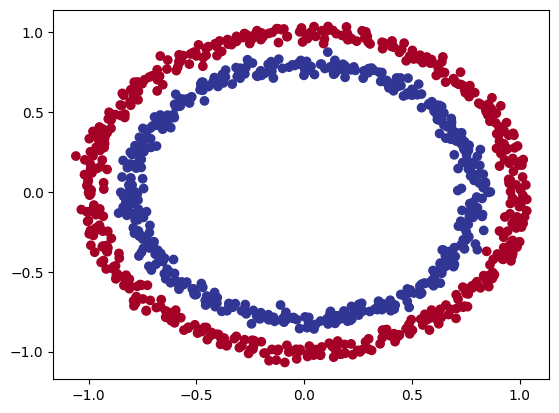

In [ ]:
# Plot our dataset
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check input and output shapes (shapes = features)
# Each X (input sample) is represented by 2 features - think as how many features represent a label y
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
scalar = torch.tensor(7)
scalar.shape    # scalar has no shape, it's just a value
# scalar.ndim

torch.Size([])

In [ ]:
X[0], type(X), X.dtype

(array([0.75424625, 0.23148074]), numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, type(X), X.dtype, y.shape, type(y), y.dtype

(torch.Size([1000, 2]),
 torch.Tensor,
 torch.float32,
 torch.Size([1000]),
 torch.Tensor,
 torch.float32)

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# 2. Building a model
import torch
from torch import nn

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# Construct out model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

  def foward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer2(self.linear_layer1(x))   # x -> layer_1 -> layer_2 -> output

In [ ]:
# Create instance of our model class

model_0 = CircleModelV0()

# Check model's current device
next(model_0.parameters()).device
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_0

CircleModelV0(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Let's replicate above model using nn.Sequential

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Make predictions with the untrained model_1
with torch.inference_mode():   # disable gradient tracking
  untrained_preds = model_1(X_test.to(device))

y_test[:10], untrained_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967],
         [ 0.2968],
         [ 0.1405],
         [ 0.2178],
         [ 0.0805],
         [-0.0284]], device='cuda:0'))

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()   # this has the sigmoid activation function built-in

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [57]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


In [ ]:
# Create training loop

# Model output -> raw logits -> activation function -> prediction probabilities -> round/argmax() -> prediction labels

# Our model outputs are  going to be raw logits.
# We can convert these logits into prediction probabilities by passing them to some kind of activation function
# sigmoid - binary classification
# softmax - multiclass classification
# Then we can convert the prediction probabilities to prediction labels by either rounding them or taking argmax().


# View the first 5 outputs of the forward pass on the test data
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test[:5].to(device))
y_logits, y_test[:5]

(tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
# Pass the y_logits through activation function to get prediction probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
# Round/argmax() the prediction probabilities to get prediction labels
y_pred = torch.round(y_pred_prob)
y_pred

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
# Instead of simply rounding, we can define a threshold like this:
# y_pred_prob >= 0.7 -> y = 1
# y_pred_prod < 0.7 -> y = 0

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_1(X_test[:5].to(device))))
y_pred_labels

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
# Building a training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)   # nn.BCELossWithLogists expects raw logits as input
  accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (Backpropagation - calculate the gradients with respect to all of the parameters of our model)
  loss.backward()

  # 5. Optimizer step (Perform gradient descent - update the parameters to reduce the gradients)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():   # disable gradient tracking
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))   # turn logits -> pred prob -> pred label

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy}")

Epoch: 0 | Train Loss: 0.69796 | Train Accuracy: 51.88% | Test Loss: 0.69440 | Test Accuracy: 57.99999999999999
Epoch: 10 | Train Loss: 0.69590 | Train Accuracy: 51.25% | Test Loss: 0.69305 | Test Accuracy: 53.0
Epoch: 20 | Train Loss: 0.69490 | Train Accuracy: 51.62% | Test Loss: 0.69254 | Test Accuracy: 49.5
Epoch: 30 | Train Loss: 0.69435 | Train Accuracy: 51.12% | Test Loss: 0.69236 | Test Accuracy: 49.5
Epoch: 40 | Train Loss: 0.69401 | Train Accuracy: 50.88% | Test Loss: 0.69232 | Test Accuracy: 51.0
Epoch: 50 | Train Loss: 0.69378 | Train Accuracy: 50.25% | Test Loss: 0.69234 | Test Accuracy: 50.0
Epoch: 60 | Train Loss: 0.69362 | Train Accuracy: 50.00% | Test Loss: 0.69239 | Test Accuracy: 51.5
Epoch: 70 | Train Loss: 0.69351 | Train Accuracy: 50.25% | Test Loss: 0.69246 | Test Accuracy: 51.0
Epoch: 80 | Train Loss: 0.69342 | Train Accuracy: 49.88% | Test Loss: 0.69254 | Test Accuracy: 50.0
Epoch: 90 | Train Loss: 0.69336 | Train Accuracy: 49.88% | Test Loss: 0.69262 | Test Acc

In [86]:
## 4. Make predictions and evaluate the model

# From above metrics, it looks like our model isn't learning anything...
# So to inspect it, let's make some predictions and visualize them

# To visualize, we're going to import a helper function called "plot_decision_boundary()" from github repo

import requests
from pathlib import Path

# Download helper funcitons from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  # create a file locally with this name, and write permissions
    f.write(request.content)   # write the request.content into the local file

from helper_functions import plot_decision_boundary, plot_predictions

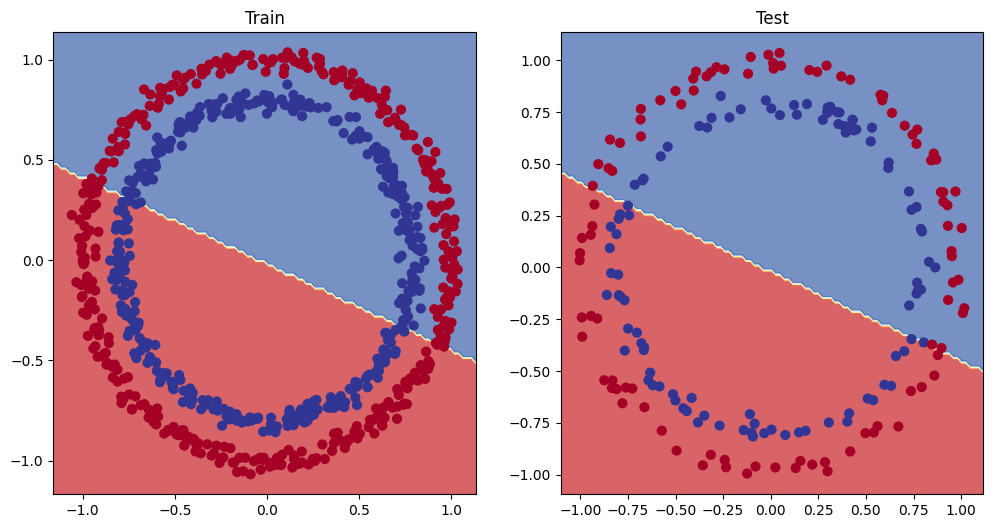

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
# 5. Improving a model through experimentation (from a model perspective rather than a data perspective)
# - add more layers - give the model more chances to learn about patterns in the data (but too many layers = may too complex for the data we are working with)
# - add more hidden units / neurons = more parameters (but too many parameters may also not be optimal)
# - fit for longer - more epochs
# - changing activation function
# - changing learning rate
# - changing the loss function

In [ ]:
# Typically you change only one thing at a time and see if your model improves or gets worse - this is called experiment tracking.
# But in this example we are going to modify multiple hyperparameters in one shot, just for learning purposes.

# We are going to:
# - add more hidden units (features)
# - add more layers
# - increase epochs

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))


In [ ]:
model_1 = CircleModelV1().to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
# Create train and test loop

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

  ### Training
  model_1.train()

  # 1. Forward pass  -   turn raw logits (which is output of our model) -> pred prob -> pred labels
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation - calculate the gradients wrt to the model parameters - think hilly landscape
  # basically propagate the loss backwards through neural net to tell each parameter how much it contributed to the loss
  loss.backward()

  # 5. Optimizer step - perform gradient descent = adjust the parameters to reduce the gradient - think roll the ball down the hill
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():   # disables gradient tracking

    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy}%")


Epoch: 0 | Train Loss: 0.69396 | Train Accuracy: 51.38% | Test Loss: 0.69261 | Test Accuracy: 51.0%
Epoch: 100 | Train Loss: 0.69305 | Train Accuracy: 51.38% | Test Loss: 0.69379 | Test Accuracy: 48.0%
Epoch: 200 | Train Loss: 0.69299 | Train Accuracy: 51.38% | Test Loss: 0.69437 | Test Accuracy: 46.0%
Epoch: 300 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69458 | Test Accuracy: 45.0%
Epoch: 400 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69465 | Test Accuracy: 46.0%
Epoch: 500 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69467 | Test Accuracy: 46.0%
Epoch: 600 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69468 | Test Accuracy: 46.0%
Epoch: 700 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69468 | Test Accuracy: 46.0%
Epoch: 800 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69468 | Test Accuracy: 46.0%
Epoch: 900 | Train Loss: 0.69298 | Train Accuracy: 51.38% | Test Loss: 0.69468 | Tes

In [ ]:
# Since our model still isn't learning to predict the non-linear data
# Let's see if our model can be fitted on linear data (ie. straight line)

# Create data per linear equation y = mx + b
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step)
y_regression = weight * X_regression + bias
X_regression[:5], y_regression[:5]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400]),
 tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression = X_regression[:train_split]
y_train_regression = y_regression[:train_split]
X_test_regression = X_regression[train_split:]
y_test_regression = y_regression[train_split:]

X_train_regression.to(device), y_train_regression.to(device)
X_test_regression.to(device), y_test_regression.to(device)
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

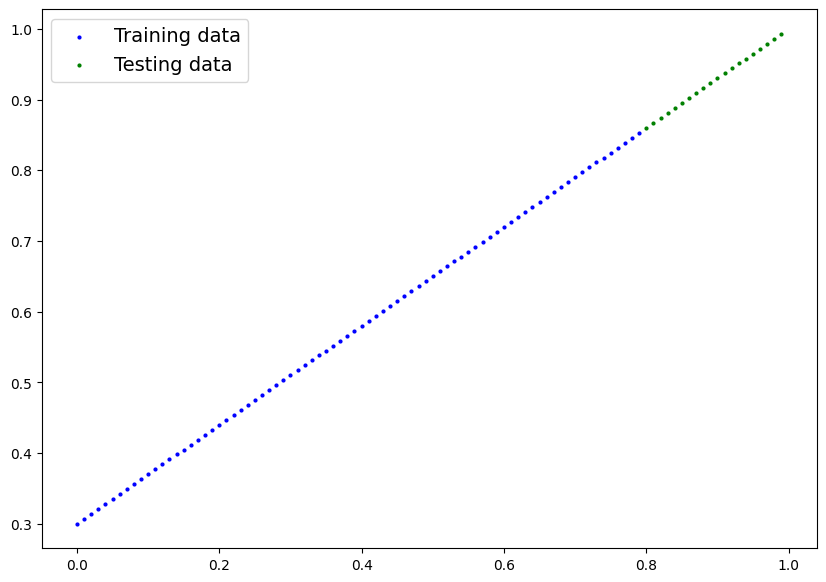

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
X_train_regression[:5].unsqueeze(dim=1)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])

In [ ]:
# Create a new model with same architecture as model_1 (ie. same layers),
# but with different number of features
# because our linear data X_train_regression - each sample has just 1 feature
# versus the non-liner data X_train - each sample had 2 features X0, X1

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

next(model_2.parameters()).device

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
# Create training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device).unsqueeze(dim=1), y_train_regression.to(device).unsqueeze(dim=1)
X_test_regression, y_test_regression = X_test_regression.to(device).unsqueeze(dim=1), y_test_regression.to(device).unsqueeze(dim=1)

for epoch in range(epochs):

  ### Training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step - perform gradient descent
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_pred = model_2(X_test_regression)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Train Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Train Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Train Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Train Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Train Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Train Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Train Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Train Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Train Loss: 0.01798 | Test Loss: 0.00360


In [ ]:
# Let's make predictions

# Why do we turn on eval mode for predictions?
# Because some layers like dropout and batch normalization behave differently in training vs. eval modes
# Setting to eval mode tells these layers to disable/turn off dropout
# Best practice - set to eval mode for Testing & Inference
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)



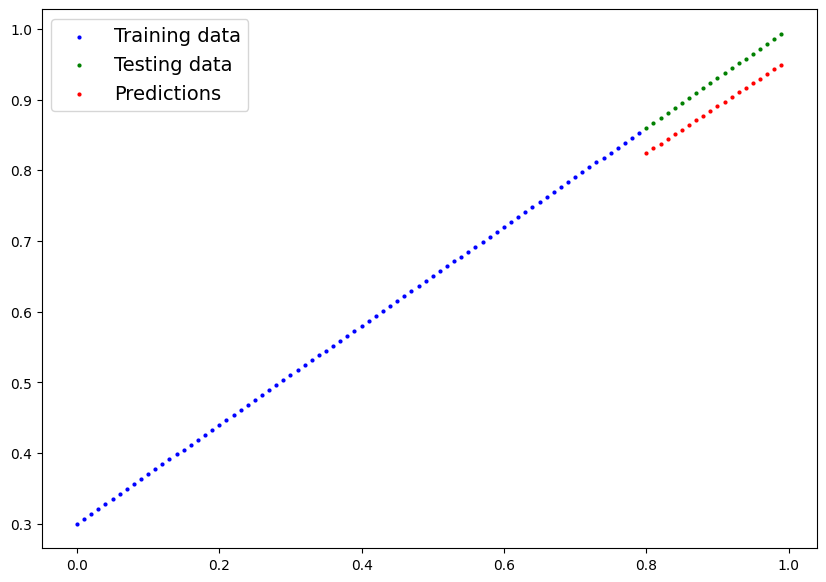

In [ ]:
# Plot predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

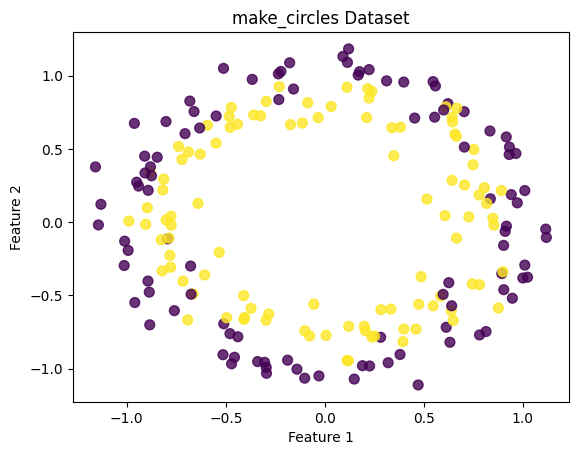

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset with 200 samples and some noise
X, y = make_circles(n_samples=200, noise=0.1, random_state=42)

X[:5], y[:5]

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

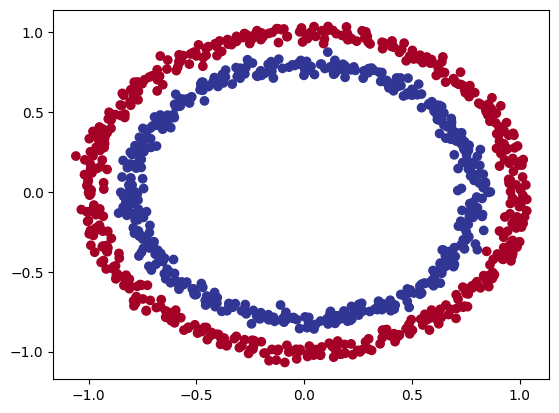

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
# plt.title("make_circles Dataset")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Let's create train and test split then convert the numpy arrays into tensors
# Note. train_test_split function expects numpy array, but in course video and
# in cells 174, 175, we converted to tensors then passed to train_test_split
# why did it work before - per AI - slight variations in sklean versions can cause this.
import torch
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)
X_train[:5]

X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [ ]:
X_train[:5], y_train[:5], X_train.device, y_train.device

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 device(type='cpu'),
 device(type='cpu'))

In [ ]:
# Building a model with non-linearity - non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()   # non-linear activation function

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [ ]:
# Training a model with non-linearity

# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Move the model to the target device
model_3.to(device)

X_train.shape, y_train.shape, X_train.device

epochs = 1000

for epoch in range(epochs):

  ### Training
  model_3.train()

  # 1. Forward pass  -   turn raw logits (which is output of our model) -> pred prob -> pred labels
  y_logits = model_3(X_train).squeeze()  # squeeze y_logits to match the dimensions of y_train
  y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> pred prob -> pred labels

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation - calculate the gradients wrt to the model parameters - think hilly landscape
  # basically propagate the loss backwards through neural net to tell each parameter how much it contributed to the loss
  loss.backward()

  # 5. Optimizer step - perform gradient descent = adjust the parameters to reduce the gradient - think roll the ball down the hill
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():   # disables gradient tracking

    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Train Loss: 0.01672 | Train Accuracy: 99.88% | Test Loss: 0.03363 | Test Accuracy: 100.00%
Epoch: 100 | Train Loss: 0.01578 | Train Accuracy: 99.88% | Test Loss: 0.03232 | Test Accuracy: 100.00%
Epoch: 200 | Train Loss: 0.01494 | Train Accuracy: 100.00% | Test Loss: 0.03117 | Test Accuracy: 100.00%
Epoch: 300 | Train Loss: 0.01418 | Train Accuracy: 100.00% | Test Loss: 0.03017 | Test Accuracy: 99.50%
Epoch: 400 | Train Loss: 0.01350 | Train Accuracy: 100.00% | Test Loss: 0.02926 | Test Accuracy: 99.50%
Epoch: 500 | Train Loss: 0.01288 | Train Accuracy: 100.00% | Test Loss: 0.02841 | Test Accuracy: 99.50%
Epoch: 600 | Train Loss: 0.01231 | Train Accuracy: 100.00% | Test Loss: 0.02750 | Test Accuracy: 99.50%
Epoch: 700 | Train Loss: 0.01180 | Train Accuracy: 100.00% | Test Loss: 0.02666 | Test Accuracy: 99.50%
Epoch: 800 | Train Loss: 0.01132 | Train Accuracy: 100.00% | Test Loss: 0.02589 | Test Accuracy: 99.50%
Epoch: 900 | Train Loss: 0.01089 | Train Accuracy: 100.00% | Test

In [ ]:
# Make predictions
model_3.to(device)
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [ ]:
# Replicating a non-linear activation function
# Try to understand what is the purpose of this lesson, why are we doing this?

import torch
import matplotlib.pyplot as plt

# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A, A.dtype, A.ndim

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32,
 1)

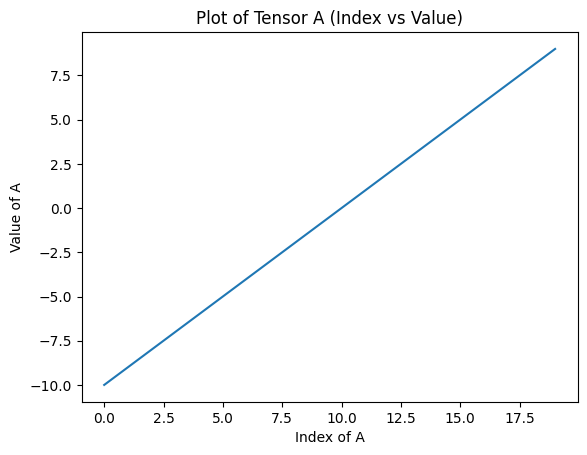

In [ ]:
plt.plot(range(len(A)), A)
plt.xlabel("Index of A")
plt.ylabel("Value of A")
plt.title("Plot of Tensor A (Index vs Value)")
plt.show()

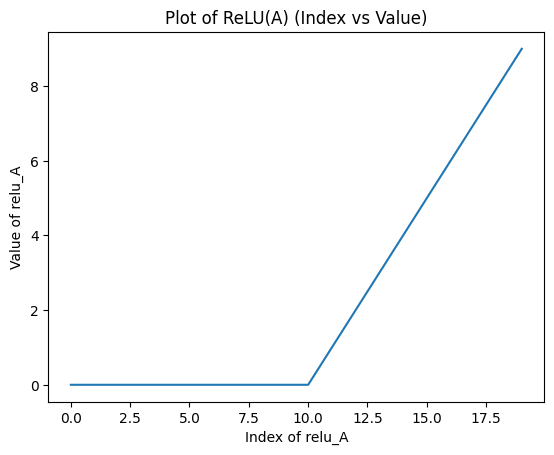

In [ ]:
# Apply ReLU to tensor A
relu_A = torch.relu(A)

# Plot the ReLU activated tensor
plt.plot(range(len(relu_A)), relu_A)
plt.xlabel("Index of relu_A")
plt.ylabel("Value of relu_A")
plt.title("Plot of ReLU(A) (Index vs Value)")
plt.show()

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)  # x is also a tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

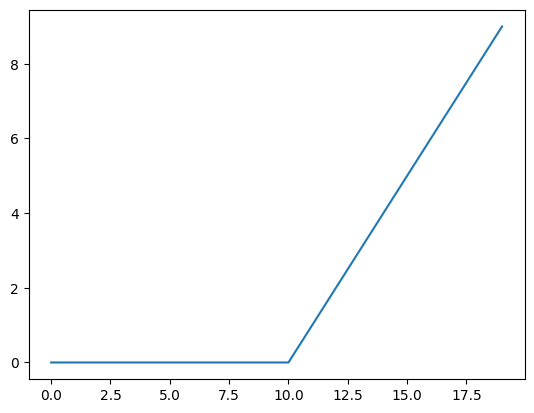

In [ ]:
# Plot our relu activation function
plt.plot(relu(A))

In [ ]:
# Let's replicate sigmoid activation function
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

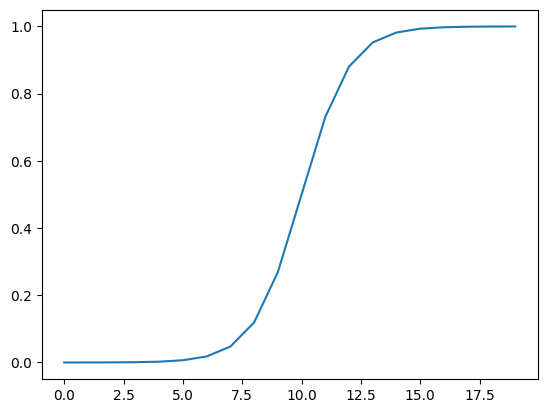

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
torch.__version__

'2.8.0+cu126'

In [82]:
# Putting it all together with multi-class classification

# Creating a multi-class toy dataset with scikit-learn
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create the multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,  # give the clusters a little shake-up
                            random_state=RANDOM_SEED)

In [83]:
# Turn data into tensors and ensure correct dtype
# if you don't make it a "long" datatype, will get this error for CrossEntropyLoss in loss calculation
# - "NotImplementedError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'"
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
y_blob.dtype

torch.int64

In [65]:
# Split into train and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

X_blob_train.shape, y_blob_train.shape, y_blob_train[:10], torch.unique(y_blob_train)

(torch.Size([800, 2]),
 torch.Size([800]),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]),
 tensor([0, 1, 2, 3]))

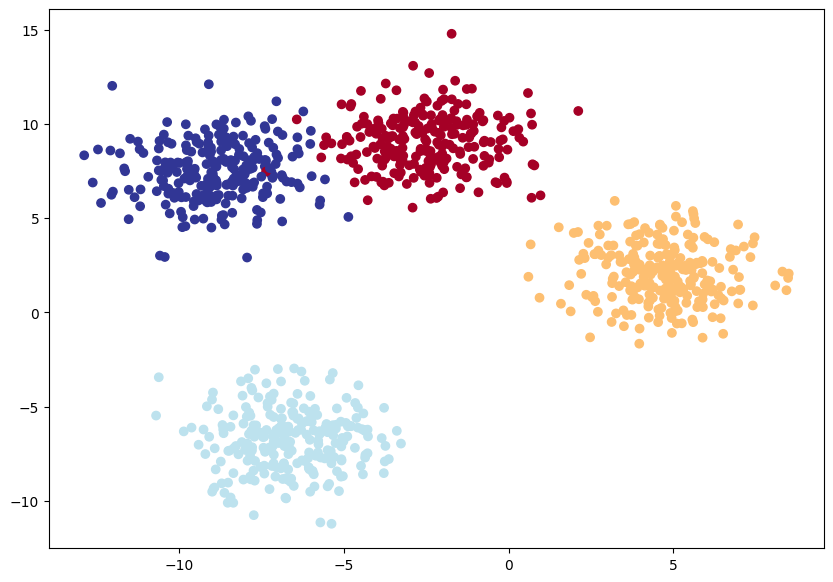

In [66]:
# Visualize, visualize, visualize
plt.figure(figsize=(10, 7))
plt.scatter(x=X_blob[:, 0], y=X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

In [67]:
# Building a multi-class classification model
device = "cuda" if torch.cuda.is_available() else "cpu"
device

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)


In [68]:
# Create an instance of BlobModel and send to target device
model_4 = BlobModel(input_features=2, output_features=4).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [69]:
X_blob_test.device

device(type='cpu')

In [70]:
# Create loss function and optimizer for multi-class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [71]:
model_4.eval()
with torch.inference_mode():
  y_blob_test_logits = model_4(X_blob_test.to(device))

y_blob_test_logits[:10], y_blob_test[:10]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [72]:
# Logits -> pred probs -> pred labels
# For multi-class classification - Activation function = softmax

y_blob_test_pred_prob = torch.softmax(y_blob_test_logits, dim=1)

y_blob_test_pred_prob[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [73]:
# plt.plot(range(len(y_blob_pred_prob)), y_blob_pred_prob.cpu().numpy())

In [74]:
torch.sum(y_blob_test_pred_prob[1]), torch.max(y_blob_test_pred_prob[1]), torch.argmax(y_blob_test_pred_prob[1])

(tensor(1.0000, device='cuda:0'),
 tensor(0.3336, device='cuda:0'),
 tensor(0, device='cuda:0'))

In [75]:
# pred prob -> pred labels (via argmax for multi-class classification)
y_blob_test_pred = torch.argmax(y_blob_test_pred_prob, dim=1)
y_blob_test_pred[:5]

tensor([1, 0, 0, 0, 0], device='cuda:0')

In [76]:
# Create train and test loop for multi-class PyTorch model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 1000

# model_4(X_blob_train).squeeze().shape, y_blob_train.shape

for epoch in range(epochs):

  ### Training
  model_4.train()

  # Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  accuracy = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():

    # Forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # Calculate the loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_accuracy = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Train Loss: 1.15883 | Train Accuracy: 40.38% | Test Loss: 1.07554 | Test Accuracy: 48.00%
Epoch: 100 | Train Loss: 0.03312 | Train Accuracy: 99.25% | Test Loss: 0.02433 | Test Accuracy: 99.50%
Epoch: 200 | Train Loss: 0.02657 | Train Accuracy: 99.25% | Test Loss: 0.01651 | Test Accuracy: 99.50%
Epoch: 300 | Train Loss: 0.02503 | Train Accuracy: 99.25% | Test Loss: 0.01440 | Test Accuracy: 99.50%
Epoch: 400 | Train Loss: 0.02427 | Train Accuracy: 99.25% | Test Loss: 0.01335 | Test Accuracy: 99.50%
Epoch: 500 | Train Loss: 0.02377 | Train Accuracy: 99.25% | Test Loss: 0.01269 | Test Accuracy: 99.50%
Epoch: 600 | Train Loss: 0.02339 | Train Accuracy: 99.25% | Test Loss: 0.01218 | Test Accuracy: 99.50%
Epoch: 700 | Train Loss: 0.02307 | Train Accuracy: 99.25% | Test Loss: 0.01179 | Test Accuracy: 99.50%
Epoch: 800 | Train Loss: 0.02279 | Train Accuracy: 99.25% | Test Loss: 0.01147 | Test Accuracy: 99.50%
Epoch: 900 | Train Loss: 0.02253 | Train Accuracy: 99.25% | Test Loss: 0.01

In [84]:
# Making predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

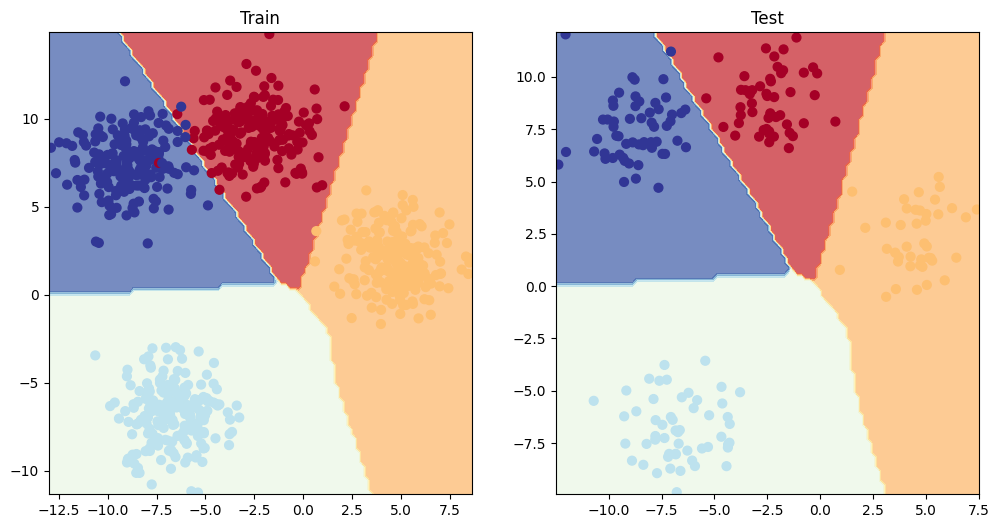

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.show()